In [173]:
# Simple linear regression on Auto data set.

from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

autos = pd.read_csv('../data/Auto.csv')
print autos.shape
num_rows, num_cols = autos.shape

(397, 9)


In [174]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()

In [175]:
autos_X = autos[['mpg', 'horsepower']]
autos_y = autos['mpg']

divider_row = int(num_rows * .8)

autos_X_train = autos_X[:divider_row]
autos_X_test = autos_X[divider_row:]

autos_y_train = autos_y[:divider_row]
autos_y_test = autos_y[divider_row:]

# Ah, crap. When I linear_regression.fit(autos_X_train.as_matrix(), autos_y_train.as_matrix), I get:
# ValueError: could not convert string to float: ?

In [176]:
# What the f? I found a similar example in scikit-learn's documentation:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#example-linear-model-plot-ols-py
# Are the argument types they're passing to LinearRegression#fit the same argument types I'm passing?

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# # The coefficients
# print('Coefficients: \n', regr.coef_)
# # The mean square error
# print("Residual sum of squares: %.2f"
#       % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# # Plot outputs
# plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
# plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
#          linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

print type(autos_y_train.as_matrix()) == type(diabetes_y_train)
print type(autos_X_train.as_matrix()) == type(diabetes_X_train)

# Answer: yes.

True
True


In [181]:
# Reading the error again, I think this is because some columns of values are strings instead of ints. Converting:

mpg = autos['mpg']
mpg = mpg.map(lambda row: int(row)) # map is non-destructive
# print mpg.map(lambda row: type(row)) # returns a bunch of ints, good.

# Generalizing to autos:
autos['mpg'] = autos['mpg'].map(lambda mpg: int(mpg))
# autos['horsepower'] = autos['horsepower'].map(lambda mpg: int(mpg)) # ValueError: invalid literal for int() with base 10: '?'
# Damn, there's a '?' in horsepower somewhere.

In [183]:
autos = pd.read_csv('../data/Auto.csv') # Start over with fresh data

# Filter out bad rows
autos = autos.ix[lambda row: row.horsepower != '?']

print autos.shape

# Cast horsepower to ints
autos['horsepower'] = autos['horsepower'].map(lambda mpg: int(mpg))

(392, 9)


In [184]:
# Now it should work...
autos_X = autos[['mpg', 'horsepower']]
autos_y = autos['mpg']

divider_row = int(num_rows * .8)

autos_X_train = autos_X[:divider_row].as_matrix()
autos_X_test = autos_X[divider_row:].as_matrix()

autos_y_train = autos_y[:divider_row].as_matrix()
autos_y_test = autos_y[divider_row:].as_matrix()

regr.fit(autos_X_train, autos_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

('Coefficients: \n', array([ 1.,  0.]))
Residual sum of squares: 0.00
Variance score: 1.00
(75, 2)
(75,)


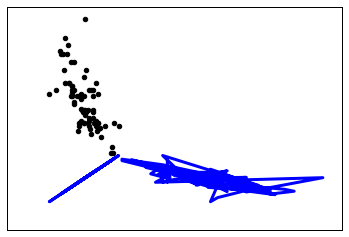

In [185]:
# Copied from scikit-learn docs...
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f" % np.mean((regr.predict(autos_X_test) - autos_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(autos_X_test, autos_y_test))

# Plot outputs
print autos_X_test.shape
print autos_y_test.shape

# First attempt gave `ValueError: x and y must be the same size`:
# plt.scatter(autos_X_test, autos_y_test, color='black')
# Because autos_X_test is of shape (75, 2) and autos_y_test is of shape (75,). autos_X_test contains both columns of data- just grab each as a vector and plot those.
plt.scatter(autos_X_test[:, 0], autos_X_test[:, 1], color='black')

plt.plot(autos_X_test, regr.predict(autos_X_test), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()